In [1]:
import numpy as np
import matplotlib.pyplot as plt

from autostep.strategies import dx_min_cut, dx_relative_evaluation_order
from autostep.numerical_derivatives import df_dx_numerical

# Non-monotonic function

In [2]:
def f_non_monotonic(x):
    return np.sin(x) * np.exp(-x)


def dfdx_non_monotonic(x):
    return np.exp(-x) * (np.cos(x) - np.sin(x))

In [3]:
x_low = 0
x_high = 10
num_of_points = 20
x_range = np.linspace(x_low, x_high, num_of_points)
f_evaluations = f_non_monotonic(x_range)
dfdx_evaluations = dfdx_non_monotonic(x_range)

In [4]:
# NBVAL_IGNORE_OUTPUT
dx = dx_min_cut(f_evaluations)

dx

2.594817713851948e-10

In [5]:
# NBVAL_IGNORE_OUTPUT
dfdx_numerical = df_dx_numerical(f_non_monotonic, x_range, dx)

dfdx_numerical

array([ 1.00000000e+00,  2.14046141e-01, -1.30338215e-01, -2.07865786e-01,
       -1.66875194e-01, -9.79387382e-02, -4.18164480e-02, -8.53926977e-03,
        5.87056955e-03,  8.97802854e-03,  7.12344210e-03,  4.14415693e-03,
        1.74765766e-03,  3.39105021e-04, -2.63518077e-04, -3.87576441e-04,
       -3.03993101e-04, -1.75303051e-04, -7.29989101e-05, -1.33952378e-05])

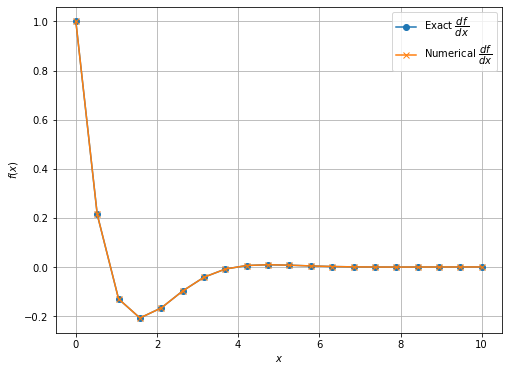

In [6]:
# NBVAL_IGNORE_OUTPUT
plt.figure(figsize=(8, 6))
plt.plot(x_range, dfdx_evaluations, "o-", label=r"Exact $\dfrac{d f}{d x}$")
plt.plot(x_range, dfdx_numerical, "x-", label="Numerical $\dfrac{d f}{d x}$")
plt.legend(loc="best")
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")

plt.show()

## Error inspection for non-automatic time-step

### Varying the number of points

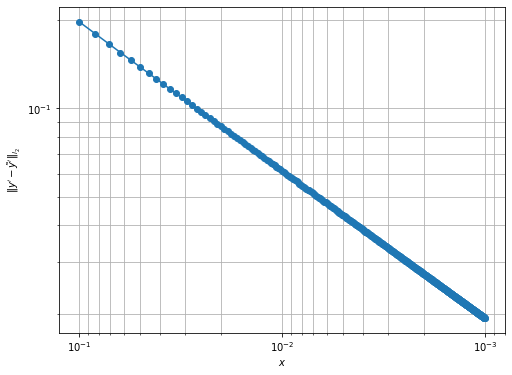

In [7]:
# NBVAL_IGNORE_OUTPUT
x_low = 0
x_high = 10
dx_array = np.array([])
error_l2_array = np.array([])
for num_of_points in range(100, 10001, 20):
    dx_classical = (x_high - x_low) / num_of_points
    x_range = np.linspace(x_low, x_high, num_of_points)
    f_evaluations = f_non_monotonic(x_range)
    dfdx_evaluations = dfdx_non_monotonic(x_range)
    dfdx_numerical_classical = df_dx_numerical(f_non_monotonic, x_range, dx_classical)
    error_l2 = np.linalg.norm(dfdx_numerical_classical - dfdx_evaluations)
    
    dx_array = np.append(dx_array, dx_classical)
    error_l2_array = np.append(error_l2_array, error_l2)
    
plt.figure(figsize=(8, 6))
plt.loglog(dx_array, error_l2_array, "o-")
plt.gca().invert_xaxis()

plt.grid(which="both")
plt.xlabel(r"$x$")
plt.ylabel(r"$\left\Vert y' - \tilde{y}' \right\Vert_{l_2}$")

plt.show()

### Varying the step size

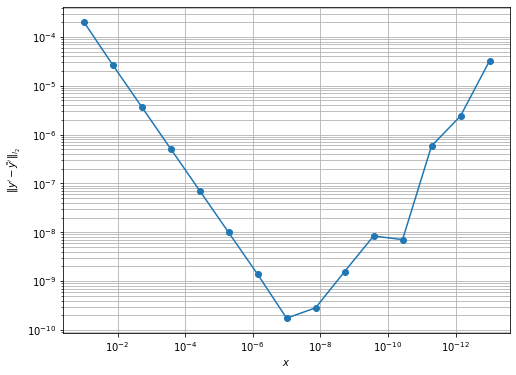

In [8]:
# NBVAL_IGNORE_OUTPUT
x_given = 5.0
f_given = f_non_monotonic(x_given)
error_l2_array = np.array([])
dx_range = np.geomspace(1e-1, 1e-13, 15)
for dx in dx_range:
    f_evaluations = f_non_monotonic(x_given)
    dfdx_evaluations = dfdx_non_monotonic(x_given)
    dfdx_numerical_classical = df_dx_numerical(f_non_monotonic, x_given, dx)
    error_l2 = np.linalg.norm(dfdx_numerical_classical - dfdx_evaluations)
    error_l2_array = np.append(error_l2_array, error_l2)

plt.figure(figsize=(8, 6))
plt.loglog(dx_range, error_l2_array, "o-")
plt.gca().invert_xaxis()

plt.grid(which="both")
plt.xlabel(r"$x$")
plt.ylabel(r"$\left\Vert y' - \tilde{y}' \right\Vert_{l_2}$")

plt.show()